In [1]:
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.layers as layers
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler


(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(y_train[:10])

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
[5 0 4 1 9 2 1 3 1 4]


In [2]:
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)
print(y_train_cat.shape)
print(y_train_cat[:5])

(60000, 10)
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [3]:
print(X_train.dtype)
X_train_float = X_train.astype('float32')
X_test_float = X_test.astype('float32')
print(X_train_float.dtype)

uint8
float32


In [4]:
values_float = np.unique(X_train_float)
print(values_float)

trainset_number, height, width = X_train_float.shape
X_train_flat = X_train_float.reshape(-1, 1) # 1 feature, -1 means the number of samples
testset_number, height, width = X_test_float.shape
X_test_flat = X_test_float.reshape(-1, 1)   # 1 feature, -1 means the number of samples


min_max_scaler = MinMaxScaler()
X_train_scaled = min_max_scaler.fit_transform(X_train_flat).reshape((trainset_number, height, width))
X_test_scaled = min_max_scaler.transform(X_test_flat).reshape((testset_number, height, width))

values_scaled= np.unique(X_train_scaled)
print(values_scaled)

[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111.
 112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125.
 126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139.
 140. 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153.
 154. 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167.
 168. 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181.
 182. 183. 184. 185. 186. 187. 188. 189. 190. 191. 192. 193. 194. 195.
 196. 

In [5]:
# convert data to 3 channels
X_train_RGB = np.stack((X_train_scaled,)*3, axis=-1)
X_test_RGB = np.stack((X_test_scaled,)*3, axis=-1)
print(X_train_RGB.shape)

(60000, 28, 28, 3)


In [6]:
model = keras.Sequential()
model.add(layers.InputLayer(input_shape=(None, None, 3)))
model.add(layers.Resizing(224, 224, interpolation='bilinear'))
model.add(MobileNetV2(include_top=False, input_shape=(224, 224, 3), pooling='avg', weights='imagenet'))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))
model.layers[1].trainable=False
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#     [
#         keras.Input(shape=input_shape),
#         layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
#         layers.MaxPooling2D(pool_size=(2, 2)),
#         layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
#         layers.MaxPooling2D(pool_size=(2, 2)),
#         layers.Flatten(),
#         layers.Dropout(0.5),
#         layers.Dense(num_classes, activation="softmax"),
#     ]

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resizing (Resizing)                  │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ mobilenetv2_1.00_224 (Functional)    │ (None, 1280)                │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         655,872 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,918,986 (11.14 MB)

 Trainable params: 661,002 (2.52 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [8]:
callbacks=[
    keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=20, restore_best_weights=True, mode='max'),
    keras.callbacks.ReduceLROnPlateau(monitor="val_accuracy", factor=0.1, patience=25, min_lr=1e-6, mode='max')
]

history = model.fit(X_train_RGB, y_train_cat, epochs=10, batch_size=512, validation_split=0.1, callbacks = callbacks)

import json
model.save('model.h5')
history_dict = history.history
json.dump(history_dict, open('history.json', 'w'))

Epoch 1/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 132s 857ms/step - accuracy: 0.9707 - loss: 0.0939 - val_accuracy: 0.9817 - val_loss: 0.0576 - learning_rate: 0.0010
Epoch 2/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 39s 370ms/step - accuracy: 0.9799 - loss: 0.0631 - val_accuracy: 0.9823 - val_loss: 0.0554 - learning_rate: 0.0010
Epoch 3/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 41s 371ms/step - accuracy: 0.9828 - loss: 0.0562 - val_accuracy: 0.9840 - val_loss: 0.0558 - learning_rate: 0.0010
Epoch 4/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 39s 357ms/step - accuracy: 0.9816 - loss: 0.0560 - val_accuracy: 0.9833 - val_loss: 0.0552 - learning_rate: 0.0010
Epoch 5/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 39s 371ms/step - accuracy: 0.9838 - loss: 0.0519 - val_accuracy: 0.9857 - val_loss: 0.0530 - learning_rate: 0.0010
Epoch 6/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 39s 356ms/step - accuracy: 0.9837 - loss: 0.0494 - val_accuracy: 0.9847 - val_loss: 0.0528 - learning_rate: 0.0010
Epoch 7/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 41s 356ms/step - accuracy: 0.

In [10]:
print(history_dict.keys())
print(history_dict['loss'])
print(history_dict['accuracy'])
print(history_dict['val_loss'])
print(history_dict['val_accuracy'])

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss', 'learning_rate'])
[0.07975033670663834, 0.06318026036024094, 0.05690379813313484, 0.054780106991529465, 0.05299593508243561, 0.04995575547218323, 0.047711774706840515, 0.045189209282398224, 0.04332154989242554, 0.04284316301345825]
[0.9750925898551941, 0.9797222018241882, 0.9823703765869141, 0.9819074273109436, 0.9832777976989746, 0.9835740923881531, 0.9844444394111633, 0.9852036833763123, 0.9862037301063538, 0.9864629507064819]
[0.05759783834218979, 0.055446822196245193, 0.055830586701631546, 0.0551733560860157, 0.05297400429844856, 0.052802637219429016, 0.05425233021378517, 0.05174444615840912, 0.051546815782785416, 0.05143413692712784]
[0.9816666841506958, 0.9823333621025085, 0.984000027179718, 0.9833333492279053, 0.9856666922569275, 0.984666645526886, 0.9835000038146973, 0.984666645526886, 0.9850000143051147, 0.9851666688919067]


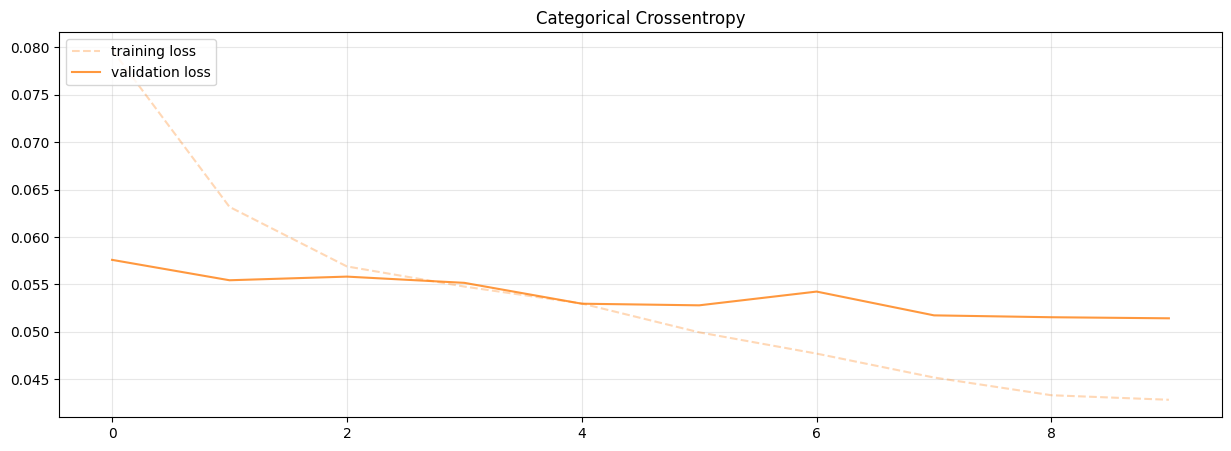

In [12]:
import matplotlib.pyplot as plt

# Plot the training histories
plt.figure(figsize=(15,5))
plt.plot(history.history['loss'], alpha=.3, label = "training loss", color='#ff7f0e', linestyle='--')
plt.plot(history.history['val_loss'], label = "validation loss", alpha=.8, color='#ff7f0e')
plt.legend(loc='upper left')
plt.title('Categorical Crossentropy')
plt.grid(alpha=.3)


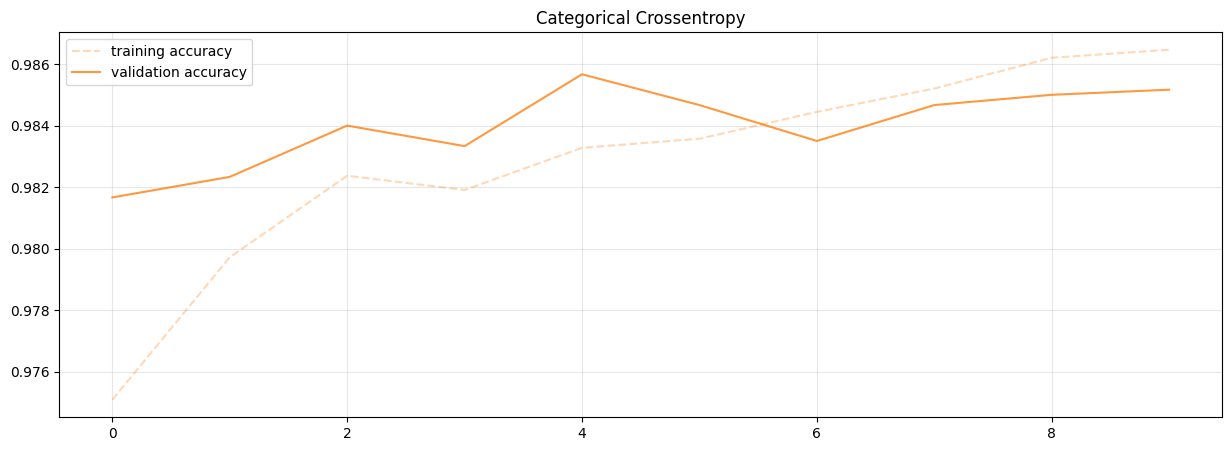

In [13]:
# Plot the training histories
plt.figure(figsize=(15,5))
plt.plot(history.history['accuracy'], alpha=.3, label = "training accuracy", color='#ff7f0e', linestyle='--')
plt.plot(history.history['val_accuracy'], label = "validation accuracy", alpha=.8, color='#ff7f0e')
plt.legend(loc='upper left')
plt.title('Categorical Crossentropy')
plt.grid(alpha=.3)

In [14]:
score = model.evaluate(X_test_RGB, y_test_cat, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.05828455835580826
Test accuracy: 0.9822999835014343


In [22]:
print(X_test_RGB.shape)
print(y_test_cat.shape)

(10000, 28, 28, 3)
(10000, 10)


In [15]:
model.save('MobileNetV2_FC.keras')

(28, 28, 3)
(10,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
(1, 10)
(28, 28, 3)
(10,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
(1, 10)
(28, 28, 3)
(10,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
(1, 10)
(28, 28, 3)
(10,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
(1, 10)
(28, 28, 3)
(10,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
(1, 10)


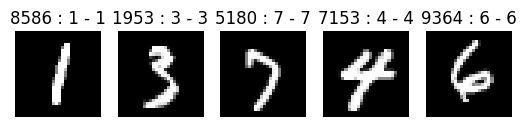

In [33]:
# Display 5 image samples
num_samples = 5
# randomly select 5 pics to display with no replications
sample_indices = np.random.choice(len(X_test_RGB), num_samples, replace=False)

for i, idx in enumerate(sample_indices):
    plt.subplot(1, num_samples, i + 1)

    # Normalize the image data to the range [0, 1]
    normalized_image = X_test_RGB[idx]  # If your original pixel values are in [0, 255]
    print(normalized_image.shape)
    print(y_test_cat[idx].shape)
    y_pred = model.predict(tf.expand_dims(normalized_image, axis=0))
    print(y_pred.shape)

    plt.imshow(normalized_image)
    plt.title(f'{idx} : {y_test[idx]} - {str(np.argmax(y_pred))}')
    plt.axis('off')

plt.show()

In [30]:
print(y_pred.shape)
print(np.argmax(y_pred))

(1, 10)
3
